In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
assets_df = pd.read_csv('../../../datasets/b3_dados/processed/acoes_concat.csv')


1. **Gráficos de Linhas: Evolução Temporal** \
\
Objetivo: Mostrar como os preços de uma ou mais ações variam ao longo do tempo.

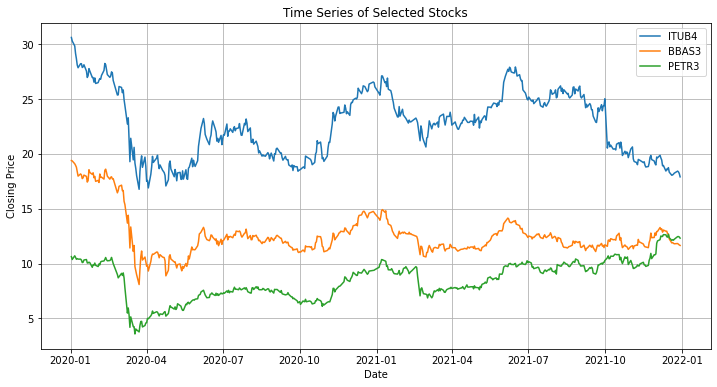

In [13]:

def plot_time_series(data, stocks, start_date=None, end_date=None):
    # Filtra os dados pelo intervalo de datas
    filtered_data = data.copy()
    filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
    if start_date and end_date:
        filtered_data = filtered_data[(filtered_data['Date'] >= start_date) & 
                                      (filtered_data['Date'] <= end_date)]
    
    # Gera o gráfico
    plt.figure(figsize=(12, 6))
    for stock in stocks:
        plt.plot(filtered_data['Date'], filtered_data[stock], label=stock)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Time Series of Selected Stocks')
    plt.legend()
    plt.grid()
    plt.show()

# Exemplos
plot_time_series(assets_df, ['ITUB4', 'BBAS3', 'PETR3'], start_date='2020-01-01', end_date='2022-01-01')



2. **Gráfico de Tendência Média**\
\
Objetivo: Suavizar as flutuações diárias e mostrar tendências gerais.\
\
Técnica: Média móvel (e.g., 7 ou 30 dias).

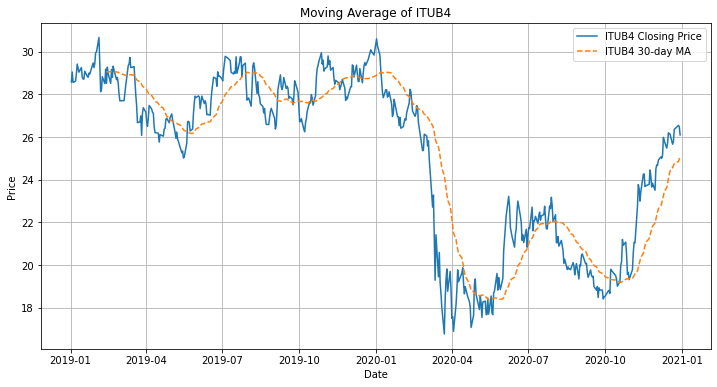

In [14]:
def plot_moving_average(data, stock, window, start_date=None, end_date=None):
    # Filtra os dados pelo intervalo de datas
    data['Date'] = pd.to_datetime(data['Date'])
    filtered_data = data.copy()
    if start_date and end_date:
        filtered_data = filtered_data[(filtered_data['Date'] >= start_date) & 
                                      (filtered_data['Date'] <= end_date)]
    
    # Calcula a média móvel
    filtered_data[f'{stock}_MA{window}'] = filtered_data[stock].rolling(window=window).mean()
    
    # Gera o gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Date'], filtered_data[stock], label=f'{stock} Closing Price')
    plt.plot(filtered_data['Date'], filtered_data[f'{stock}_MA{window}'], 
             label=f'{stock} {window}-day MA', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Moving Average of {stock}')
    plt.legend()
    plt.grid()
    plt.show()

# Exemplo
plot_moving_average(assets_df, 'ITUB4', window=30, start_date='2019-01-01', end_date='2021-01-01')


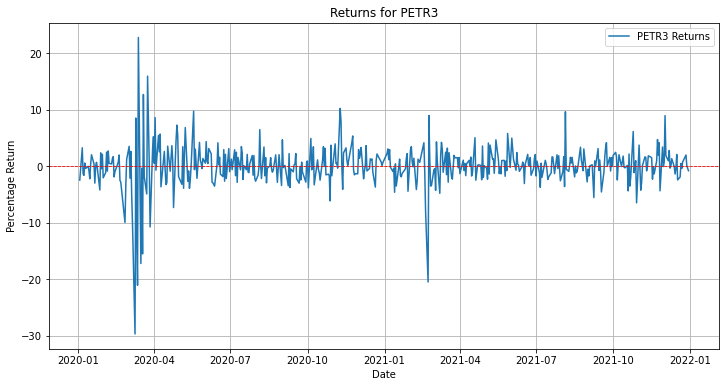

In [15]:
def plot_returns(data, stock, start_date=None, end_date=None):
    # Filtra os dados pelo intervalo de datas
    data['Date'] = pd.to_datetime(data['Date'])
    filtered_data = data.copy()
    if start_date and end_date:
        filtered_data = filtered_data[(filtered_data['Date'] >= start_date) & 
                                      (filtered_data['Date'] <= end_date)]
    
    # Calcula os retornos percentuais
    filtered_data['Returns'] = filtered_data[stock].pct_change() * 100
    
    # Gera o gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Date'], filtered_data['Returns'], label=f'{stock} Returns')
    plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
    plt.xlabel('Date')
    plt.ylabel('Percentage Return')
    plt.title(f'Returns for {stock}')
    plt.legend()
    plt.grid()
    plt.show()

# Exemplo
plot_returns(assets_df, 'PETR3', start_date='2020-01-01', end_date='2022-01-01')
